
**Preface/Introduction**

(note that much of the work below is based on the writings and teachings of Paul Wilmott and also the online financelab tutorial here: https://www.youtube.com/watch?v=gCkllPz_e2g&list=PL282rsT1FosVRvpcKOIRhLp3q6yX19ZV0&index=1&t=1265s)

Geometric Brownian Motion: Using a stochastic differential equation (SDE) together with a brownian motion (weiner process) to model possible future paths of stock prices (and then run that model multiple times in  a monte carlo simulation).

So firstly lets take a look at the stock pricing model which we are going to build in python (before running that model thousands of times through a monte carlo simulation to generate thousands of possible future paths for the stock). That model is a combination of a Stochastic differential equation and a weiner process (brownian motion).

we're going to use laTex notation within google colab in order to state the model in scientific/mathematical notation before describing it. And i'm using (as a reference) the following notebook: https://colab.research.google.com/github/bebi103a/bebi103a.github.io/blob/main/lessons/00/intro_to_latex.ipynb#scrollTo=yy7o4iwaTHCx   to help with the laTex notation.

The model:

\begin{align}
\frac{dS}{S} = \mu dt + \sigma dW_1
\end{align}

Lets break the model down, so firstly dS is a small change in the Stock price (for example what it will change to tomorrow) whereas S is what the stock is currently and therefore

\begin{align}
\frac{dS}{S}
\end{align}

is a comparison of the changed stock price (the price tomorrow) compared to the current price/the price today. This stated change (comparing the current stock price to the changed process in the a next moment of time) is often called: The Return.

Note it is also important to understand that this stated change is a single change and therefore is for a single step or time moment in the model and that what 'd' is referring to (a small moment in time), d is also referring to a small change.

So if the left hand side of the equation (the SDE) is referring to a change, then the right hand side of the equation is modelling that same change but in more detail.
The change in stock price (in more detail) is comprised of two elements:  the first element being essentially what is called 'the drift' or a fraction of the expected annualised average movement, this is this portion:

\begin{align}
\mu dt
\end{align}

If we just left each step of the model as being that, and the annualised average change in the stock was a positive change e.g. 15% increase, then as the step change is just a small fraction (dt) of that, then every step change in the model would be positive. This would mean that every single modelled change is always positive and upwards, so we'd wind with just a 15% upward projection for every possible stock path with every single change always being positive, now whereas overall we know that the stock is 'likely' to increase across the year by 15%, it wouldn't be realistic to model step in that manner: real life doesn't work like that, we get highs, lows, ups and downs and erratic, random/stochastic behaviour, so we need a second 'random' element in the model which is this element:

\begin{align}
\sigma dW_1
\end{align}

  sigma ($\sigma$) is just the annualised volatility, i.e. on average across a  year how much the stock deviates from the average. Very often this is done by taking the standard deviation of each month, taking the average of that and projecting this across the year. 'di is just a fractional portion of sigma (relative to the model time step), so ($\sigma d$) is a time fractioned portion of the annualised volatility, but note that ($\sigma$) is one standard deviation, but there is an underlying assumption that if the stock price can change in accordance with the normal distribution, then the stock can change by as much as 3 standard deviations - so either upwards in size of 3 standard deviations or downwards in size (in accordance with the standard normal distribution model) by 3 standard deviations and the extent of the deviation follows the standard normal distribution but is also random, so it has a possible deviation range of as much 3 standard deviations but is most likely or most probable to deviate by 0 or between -1 and +1. And it is the weiner process (or brownian motion) that generates that stochastic sigma change factor and that stochastic normal distribution adjustment factor (generated by the weiner process) is this part of the equation:

  \begin{align}
\ W_1
\end{align}

Note that the Weiner process (brownian motion) instead of just stating it in the more abbreviated form 'W' in a more detailed form showing that it  follows the standard normal distribution, which is a normal dsitribution 'N' where the mean average of the distribution is 0 and the standard deviation is one standard deviation or 1, is annotated as follows:

  \begin{align}
\ N(0,\sigma^2 = t)
\end{align}

Note also that one standard deviation squared is the same as the time change and (that is to say if we take one standard deviation of change in stock value and square it we get the amount of time change). And therefore, simarly, if we take the square root of the change in time for one time step we get one standard deviation of a change in stock value. This relationship of the change in value of stock and change in value in time goes back to ideas noted by einstein and brown, which is that molecules although moving randomly tend to move in a square root relation to time.



Therefore the right hand side of the stochastic differential equation is stating the random (stochastic) change (the sigma part) together with predicatible regular 'drift' we routinely expect each year from the stock:

\begin{align}
 \mu dt + \sigma dW_1
\end{align}

So if we implement this equation in python, all we need to know is the annualised average movement of the stock and the annualised average standard deviation (one standard deviation) of the stock, and as long as we can take  a fraction of those parameters (in accordance with whichever timestep 'd' we agree upon e.g. one day (t), and adjust this by the normally distributed random (stochastic) factor (from the weiner process), then we're good to go, we now have a model that can effectively model each change in the stock in accordance with sound/realistic modelling principles that only model in the routine expected factor but also a reasonable random/stochastic factor.

Finally if we can use this model to effectively model a possible path of stock through the year, we can take that model and run it multiple times through a 'simulator' (whose job is literally just to keep re-running the model and record the results) and this simulator is popularly called: 'the monte carlo simulation', the reason we want to see this model run many times (and probably thousands of times) is because of the stochastic/random part of the model, this means that for each run of the model, we'll get different stock paths, but if we run the model thousands of times we will get 1: the highest possible future price from all possible paths 2: the lowest possible future price from all possible paths 3. the most likely/probably possible future path. I think that the most useful aspect of this model is calculating the highsest possible future price and the lowest possible future price, because these prices can be used for (and in fact are used in) OPTIONS pricing model.













In [1]:
# note that this ipython notebook has been built in google colab: https://colab.research.google.com/
#import the core modules which we need to build the model and run the simulation
# very often when we deal with data and also run scientific/mathematical operations across that data we need the following two packages

import numpy as np #contains array constructs and classes for random numbers and normal distributions
import pandas as pd # contain classes which allow us to handle data structures

# we also want visualisations so we're going to invoke a package useful for visualising data structures, namely matplotlib
import matplotlib.pyplot as plt
# a magic command here which gives intel about how code is working
%matplotlib inline

# we need historic finance data as a basis from which to model the future stock price paths
# note i'm assuming that googlecolab is making yfinance available (I may need to do a pip install if it isn't)
import yfinance as yf



In [2]:

# next we download a history of tsla stock into a pandas dataframe called 'actual_hist'
# note the use of the download method of the yfinance class
# start from 01/01/24 to 01/01/25 for share details
actual_hist  = yf.download('tsla','2024-01-01','2025-01-01')

# Move the index into a regular column
actual_hist = actual_hist.reset_index()
# Ensure the "Date" column is in datetime format
actual_hist['Date'] = pd.to_datetime(actual_hist['Date'])
actual_hist.set_index('Date', inplace=True)
actual_hist = actual_hist.sort_index(ascending=True)


# add a returns column which may be used to compute annualised drift and volatility subsequently
actual_hist['DailyReturn'] = actual_hist['Close'].pct_change()

# Replace NaN values in the DailyReturn column  with 0
actual_hist['DailyReturn'] = actual_hist['DailyReturn'].fillna(0)
actual_hist['Close'] = actual_hist['Close'].fillna(0)
# we use the iloc function of the pandas dataset to look at the first row (0) and the last row (-1) to take a quick look and see
# if the data looks sensible at first sight:

print(actual_hist.iloc[[0,-1]])


[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            TSLA        TSLA        TSLA        TSLA        TSLA   
Date                                                                     
2024-01-02  248.419998  248.419998  251.250000  244.410004  250.080002   
2024-12-31  403.839996  403.839996  427.929993  402.540009  423.790009   

Price          Volume DailyReturn  
Ticker           TSLA              
Date                               
2024-01-02  104654200     0.00000  
2024-12-31   76825100    -0.03251  


Text(0, 0.5, 'Close')

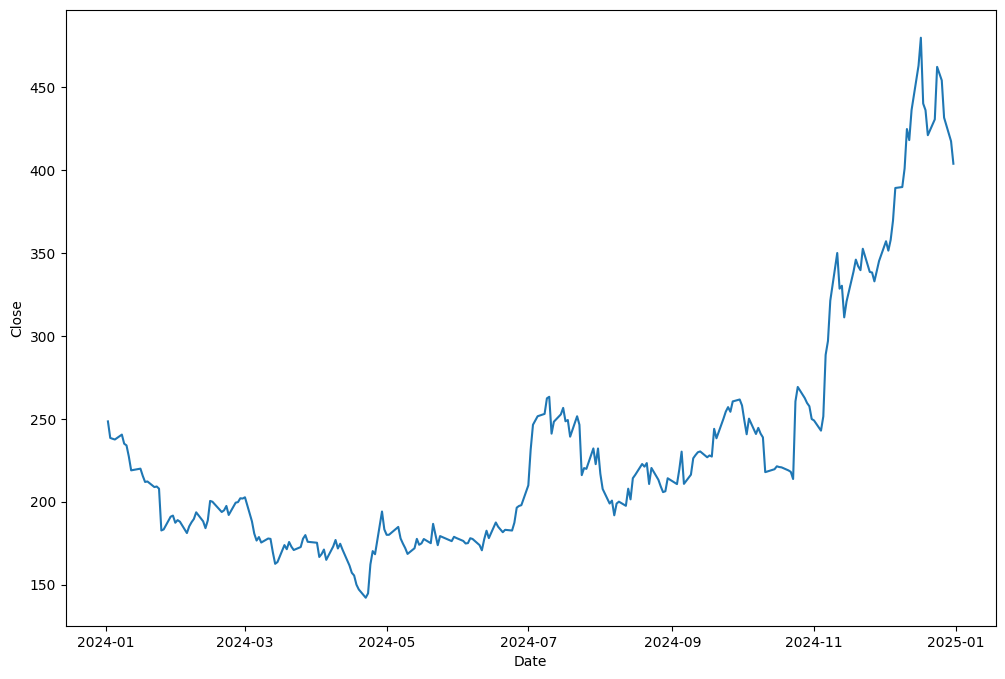

In [ ]:
#now lets use pyplot to get a visualisation of the history of the TESLA stock (tsla) over time

#first we create a figure (or window) within which to hold the chart visualisation
fig = plt.figure(figsize=(12,8))
# next we create the essential chart on the basis of a specific dimension on the dataset, in this case the closing price (Close)
# note that the index field is automatically invoked in the chart, we don't need to specify its inclusion, in this case the index is 'date'
plt.plot(actual_hist['Close'])
# we label the x axis which will show the index value 'date'
plt.xlabel('Date')
# the y axis contains the value we are concerned to plot against the time/date index, namely the stock close price values, we add the y label:
plt.ylabel('Close')




In [4]:
# now we start building the model   to predict full possible range of future prices

# from the historic data (given that it is daily data) we derive the number of time steps (n_t)
# which should be around 252 (1 year of trading days) - note we are going to use the year's date to get the annualised volatility
# and the annualised drift and also work out a 1 day time step and use these metrics to predict the next year's possible range of prices

n_t = len(actual_hist)
# print out the number of trading days from the historic data:
print ("Number of historic trading days in downloaded data ", n_t)

# next we're doing to state that we model 10000 stock paths using the model (in other words we'll run the monte carlo simulation which will run
# the model) 10000 times
n_mc = 10000
# next we create a huge dataframe which will hold (in each column) each simulated pathway - the results for each run of the model
# note that each row holds each day, but that each column holds a unique stock pathway from each monte carlo model run
St = pd.DataFrame(0., index=actual_hist.index, columns = list(range(1,n_mc+1)))
# for all columns in the results dataframe (and therefore each possible pathway) update all columns (and therefore scenarios) to be the last
# known day of trading's close value (we will use the value as a basis upon which to predict the possible values for the next year)
St.iloc[0] = actual_hist['Close'].iloc[-1]

# update the date range (index) in the 'St' datafrane such that all rows state date values for the next year
# Add one year to each date in the index
St.index = St.index + pd.DateOffset(years=1)
print(St.iloc[[0,-1]])


# next we state the main parameters for the stock (annualised volatility and the annualised mean average stock price also known as the drift)

# first we'll create a dataset for the last 60 days so as to use the most recent behaviour of the stock to also gauge what might
# happen next

#  Get the last 60 days of close prices

#last_60_days = pd.DataFrame(actual_hist, index=actual_hist.index, columns=["Close","Date"])
last_60_days = pd.DataFrame(actual_hist[["Close"]].iloc[-60:-1])
#last_60_days = actual_hist.iloc[-60]
print(last_60_days.iloc[[0,-1]])
print(f"\nNumber of rows: {len(last_60_days)}")

# add a returns column which may be used to compute annualised drift and volatility subsequently
last_60_days['DailyReturn'] = last_60_days['Close'].pct_change()

# firstly compute the drift (also known as annualised mean but 'drift' is a business term which translates to a business growth assumption)

mean_daily_return = actual_hist['DailyReturn'].mean()

mean_daily_return_60days = last_60_days['DailyReturn'].mean()

#  Annualize the drift
trading_days_per_year = 252  # Average number of trading days in a year
annualized_drift = mean_daily_return * trading_days_per_year
mu = annualized_drift
mu60days = mean_daily_return_60days * trading_days_per_year

print(f"Annualized Drift (μ) for TSLA in 2024: {mu}")
print(f"Annualized Drift (μ) for TSLA in 2024 using last 60 days data: {mu60days}")

# annualised volatility:

daily_volatility = actual_hist['DailyReturn'].std()
annualized_volatility = daily_volatility * np.sqrt(trading_days_per_year)
print(f"Annualized Volatility for TSLA (last 60 days): {annualized_volatility}")

daily_volatility60days = last_60_days['DailyReturn'].std()
annualized_volatility60days = daily_volatility60days * np.sqrt(trading_days_per_year)
print(f"Annualized Volatility for TSLA (last 60 days): {annualized_volatility60days}")
#******next we define the time step 'dt' which is conventionally stated as a fraction of 1 year)***********
# conventionally (in finance) time is phrased in relation to 1 year, which (conventionally) in finance is a 252 day trading year
dt = 1./(n_t - 1)
# now that we have the day fraction defined we can adjust/scale the annualised volatility sigma to a day's worth fraction also
daily_sigma = annualized_volatility*np.sqrt(dt)
print ("The daily (scaled) volatility/sigma is: ", daily_sigma)
daily_sigma60days  = annualized_volatility60days*np.sqrt(dt)
print ("The daily (scaled) volatility/sigma  (last 60 days) is: ", daily_sigma60days)














Number of historic trading days in downloaded data  252
                 1           2           3           4           5      \
Date                                                                     
2025-01-02  403.839996  403.839996  403.839996  403.839996  403.839996   
2025-12-31    0.000000    0.000000    0.000000    0.000000    0.000000   

                 6           7           8           9           10     ...  \
Date                                                                    ...   
2025-01-02  403.839996  403.839996  403.839996  403.839996  403.839996  ...   
2025-12-31    0.000000    0.000000    0.000000    0.000000    0.000000  ...   

                 9991        9992        9993        9994        9995   \
Date                                                                     
2025-01-02  403.839996  403.839996  403.839996  403.839996  403.839996   
2025-12-31    0.000000    0.000000    0.000000    0.000000    0.000000   

                 9996        9997

                 1           2           3           4           5      \
Date                                                                     
2025-01-02  403.839996  403.839996  403.839996  403.839996  403.839996   
2025-12-31    0.000000    0.000000    0.000000    0.000000    0.000000   

                 6           7           8           9           10     ...  \
Date                                                                    ...   
2025-01-02  403.839996  403.839996  403.839996  403.839996  403.839996  ...   
2025-12-31    0.000000    0.000000    0.000000    0.000000    0.000000  ...   

                 9991        9992        9993        9994        9995   \
Date                                                                     
2025-01-02  403.839996  403.839996  403.839996  403.839996  403.839996   
2025-12-31    0.000000    0.000000    0.000000    0.000000    0.000000   

                 9996        9997        9998        9999        10000  
Date            

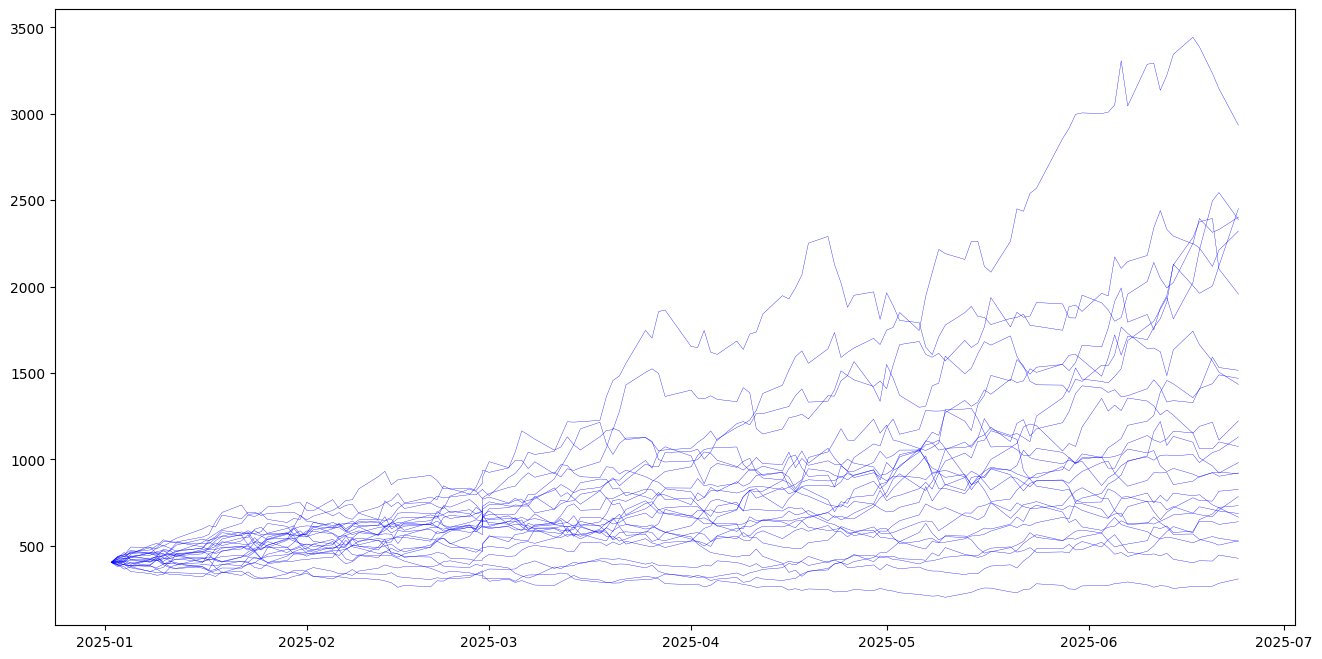

In [5]:
# future model for 15/3/25 near 3 months time future prediction

# the model is created and run through a montecarlo simulation and the results are output in the results dataframe ST
# note that the for each loop only tackles the number of rows/timesteps
for i in range (1, n_t):
    # dS_2_S is 10000 changes in stock generated using the stochastic differential equation (time adjust drift plus random normally distributed
    # time adjusted volatility) - i.e 10000 time step stock adjustments - one for each of the 10000 models , for one day
    dS_2_S = mu60days*dt + daily_sigma60days*np.random.randn(n_mc)
    #dS_2_S = mu*dt + daily_sigma*np.random.randn(n_mc)
    # he next day's values become the previous days values plus the model adjustment (for each day)
    St.iloc[i] = St.iloc[i-1] + St.iloc[i-1]*dS_2_S


last_60_days_initial = St.iloc[0:120]

# create a plot and randomly select a specific number of paths resulting from the simulation/model and visualise
# and moreover display the results of the model against the actual historical price
fig = plt.figure(figsize=(16,8))
axl = fig.add_subplot(111)
# the choice method of the numpy random class is used to randomly pick a number from 1 to 10000, and this is done 20 times which
# also links to the for each loop being run 20 times - i.e. we pick 20 model results randomly from our set of model results 'ST'
for i in np.random.choice(np.array(range(1,n_mc+1)), size=25):
   # the random selected above 'i' is used to select a column from the results of the model 'ST' and this pathway is then plotted  in blue
   # line thickness being 0.5
   axl.plot(last_60_days_initial[i], 'b', lw=0.25)
  #axl.plot(St[i], 'b', lw=0.25)




# in addition to the 20 randomly picked results of the model we also now add the actuals as red thicker line to the plot
#axl.plot(actual_hist['Close'],'r', lw=1 )
plt.show()

In [6]:
print(last_60_days_initial)

                  1            2           3            4            5      \
Date                                                                         
2025-01-02   403.839996   403.839996  403.839996   403.839996   403.839996   
2025-01-03   407.951167   416.017597  358.849644   399.455536   415.725272   
2025-01-04   409.161905   407.567957  358.304618   444.586429   432.271114   
2025-01-05   450.624029   401.566644  369.061882   456.609177   465.597647   
2025-01-08   479.890744   400.182346  352.692363   447.234334   473.605364   
...                 ...          ...         ...          ...          ...   
2025-06-17  2343.395712  1999.897115  680.241372  1429.992567  2226.888855   
2025-06-18  2263.577137  2070.751083  719.925689  1443.018754  2376.264007   
2025-06-20  2390.175579  2045.238736  715.637433  1399.282907  2378.892198   
2025-06-21  2324.235463  2168.332845  707.590358  1449.199518  2600.442669   
2025-06-24  2388.689255  2251.679040  702.444074  1432.631776  2

In [ ]:
# call option = when stock is likely to go UP
# put option = when stock is likely to go DOWN